In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from helper import readFile
from helper import oneHotEncoder
from NeuralNetwork import NeuralNetwork

%matplotlib inline

### Load data and One-Hot-Encode

In [2]:
# read the data
trainFeature, trainLabel = readFile('./data/train/lab/hw2train_labels.txt', './data/')
devFeature, devLabel = readFile('./data/dev/lab/hw2dev_labels.txt', './data/')
evalFeature, evalLabel = readFile('./data/eval/lab/hw2eval_labels.txt', './data/')

# One-Hot-Encode for labels
trainLabel = oneHotEncoder(trainLabel, 9)
devLabel = oneHotEncoder(devLabel, 9)
evalLabel = oneHotEncoder(evalLabel, 9)

In [3]:
print(trainFeature.shape, devFeature.shape, evalFeature.shape)

(5060, 1120) (731, 1120) (909, 1120)


### Relu non-linearity

****************************************
Start Training Using relu Loss Function
1000 th Iteration is done, used time	 157.14 s
2000 th Iteration is done, used time	 309.15 s
3000 th Iteration is done, used time	 462.42 s
4000 th Iteration is done, used time	 616.25 s
5000 th Iteration is done, used time	 769.15 s
Reach the maximum iteration, training is done !
Total training time: 	 769.15 s


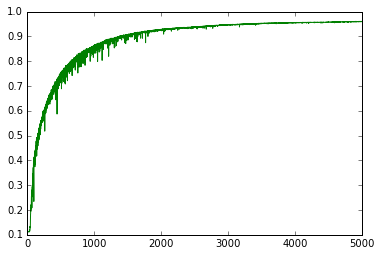

In [4]:
# create the Neural Network classifier
nn = NeuralNetwork(netSize=(30, 30, 9), loss='relu', maxIter=5000, 
                   batchSize=100, learningRate=0.1, CV=True)

# train the model
test = nn.train(trainFeature, trainLabel, showFreq=1000)

# get the error rate
trainAcc, w = nn.getParams()

# plot the training accuracy
plt.plot(trainAcc, 'g')
plt.show()

### Sigmoid non-linearity

****************************************
Start Training Using sigmoid Loss Function
1000 th Iteration is done, used time	 463.41 s
2000 th Iteration is done, used time	 922.18 s
3000 th Iteration is done, used time	 1381.55 s
4000 th Iteration is done, used time	 1828.34 s
5000 th Iteration is done, used time	 2275.37 s
Reach the maximum iteration, training is done !
Total training time: 	 2275.37 s


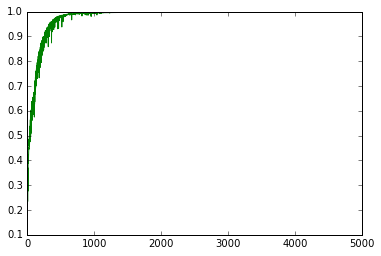

In [5]:
# create the Neural Network classifier
nn = NeuralNetwork(netSize=(30, 30, 9), loss='sigmoid', maxIter=5000, 
                   batchSize=100, learningRate=0.5, CV=True)

# train the model
test = nn.train(trainFeature, trainLabel, showFreq=1000)

# get the error rate
trainAcc, w = nn.getParams()

# plot the training accuracy
plt.plot(trainAcc, 'g')
plt.show()

### Tanh non-linearity

****************************************
Start Training Using tanh Loss Function
1000 th Iteration is done, used time	 735.2 s
2000 th Iteration is done, used time	 1468.38 s
3000 th Iteration is done, used time	 2201.83 s
4000 th Iteration is done, used time	 2934.98 s
5000 th Iteration is done, used time	 3669.82 s
Reach the maximum iteration, training is done !
Total training time: 	 3669.82 s


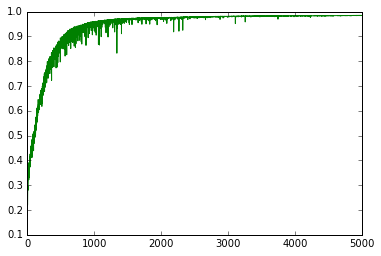

In [6]:
# create the Neural Network classifier
nn = NeuralNetwork(netSize=(30, 30, 9), loss='tanh', maxIter=5000, 
                   batchSize=100, learningRate=0.5, CV=True)

# train the model
test = nn.train(trainFeature, trainLabel, showFreq=1000)

# get the error rate
trainAcc, w = nn.getParams()

# plot the training accuracy
plt.plot(trainAcc, 'g')
plt.show()

### TensorFlow

In [7]:
#########################################################
# Part 5: TensorFlow Analysis
print('*' * 40)
print('Part 5: TensorFlow Analysis')

****************************************
Part 5: TensorFlow Analysis


In [8]:
# # begin the session
# sess = tf.Session()

# # Create the model
# x = tf.placeholder(tf.float32, [None, 16])
# W = tf.Variable(tf.random_normal([16, 2]))
# b = tf.Variable(tf.random_normal([2]))
# # W = tf.Variable(tf.zeros([16, 2]))
# # b = tf.Variable(tf.zeros([2]))
# y = tf.nn.softmax(tf.matmul(x, W) + b)

# # Define loss
# y_ = tf.placeholder(tf.float32, [None, 2])
# cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

# # Define optimizer
# learning_rate = 0.2  # learning rate
# train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

# # Train
# init = tf.initialize_all_variables()  # initialize the model
# sess.run(init)

# # Test trained model on training set
# correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# # define accuracy variable to record the process
# trainAcc = []
# devAcc = []
# evalAcc = []

# max_iteration = 1000
# for i in range(max_iteration):
#     batch_xs, batch_ys = trainFeature, trainLabel
#     sess.run(train_step, {x: batch_xs, y_: batch_ys})
#     # keep recording the accuracy
#     trainAcc.append(sess.run(accuracy, feed_dict={x: trainFeature, y_: trainLabel}))
#     devAcc.append(sess.run(accuracy, feed_dict={x: devFeature, y_: devLabel}))
#     evalAcc.append(sess.run(accuracy, feed_dict={x: evalFeature, y_: evalLabel}))

# # Test trained model on evaluation set
# print('Tensor Flow Analysis')
# print(str(max_iteration) + "th Iteration, Training Error Rate: \t", 
#       1 - sess.run(accuracy, feed_dict={x: trainFeature, y_:trainLabel}))
# print(str(max_iteration) + "th Iteration, Devalopment Error Rate: \t", 
#       1 - sess.run(accuracy, feed_dict={x: devFeature, y_:devLabel}))
# print(str(max_iteration) + "th Iteration, Evaluation Error Rate: \t", 
#       1 - sess.run(accuracy, feed_dict={x: evalFeature, y_: evalLabel}))

# # close the session
# sess.close()

# fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(range(1, max_iteration + 1), 1 - np.array(trainAcc), 'g', linewidth=2, label='Training Error Rate')
# # ax.plot(range(1, max_iteration + 1), 1 - np.array(devAcc), 'r', label='Development Error Rate')
# # ax.plot(range(1, max_iteration + 1), 1 - np.array(evalAcc), 'b', label='Evaluation Error Rate')
# ax.set_xlabel('Iterations', fontsize=10)
# ax.set_ylabel('Error Rate', fontsize=10)
# # ax.set_title('Convergence of Error Rate (TensorFlow)', fontsize=14)
# ax.legend(loc=1, fontsize=12)
# ax.grid('on')

# fig.savefig('./result/tensorflow.pdf')
# plt.show()